## Exercise 2

**Exploratory Data Analysis - Titanic Data Set**


In [2]:
import pandas as pd

In [3]:
file_path = '/Users/lele/Desktop/CPSC 4800/titanic.csv'

In [4]:
titanic = pd.read_csv(file_path)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
summary_statistics = titanic.describe()
print(summary_statistics)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


---
## 1) Determine if the Survival Rate is associated to the Class of Passenger
---

In [7]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

### a) Contigency table of the two categorical variables:

In [8]:
contingency_table1 = pd.crosstab(titanic['Pclass'], titanic['Survived'])
contingency_table1

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### b) Side-by side Plot

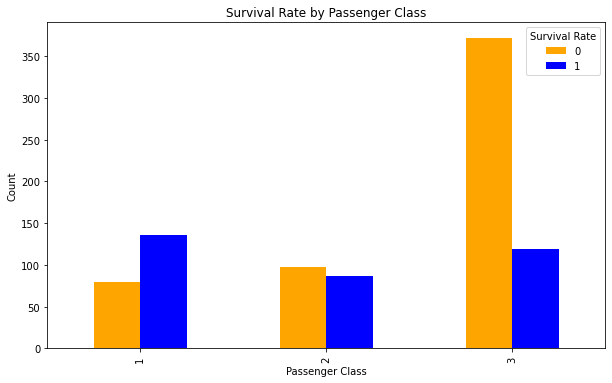

In [9]:
# Plot the side-by-side bar graph
contingency_table1.plot(kind='bar', stacked=False, figsize=(10, 6), color=['orange', 'blue'])

# Customize the plot
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survival Rate", loc="upper right")


# Show the plot
plt.show()


---

## Interpretation of the graph:

_When we examine the side-by-side graph, it becomes evident that there is no apparent independence between Survival Rate and Passenger Class. This suggests a likely association between the two variables. To confirm and formally test our hypothesis, let's proceed with a Chi-Square analysis._

---

---
## Hypotheses

 _H0: Survival Rate and Passenger Class are independent among all subjects in the population_

 _Ha: Survival Rate and Passenger Class are not independent among all subjects in the population_
 
---


### c) Perform the Chi-square test

In [10]:
chi2, p, dof, expected = chi2_contingency(contingency_table1)

# Output the chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 102.88898875696056
P-value: 4.549251711298793e-23
Degrees of freedom: 2
Expected frequencies table:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


### Conclusion:

_Since the Chi-square value of 102.889 is greater than the decision point DP = 5.99 with 2 Degrees of Freedom (Based in the Chi-Square Decision Point Table), we have enough evidence to reject the null hypothesis and conclude that the Survival Rate and Passenger Class are not significantly independent of each other among all subjects in the population._

### In conclusion, there are association between Survival Rate and Passenger Class


---
## 2) Determine if the Survival Rate is associated to the Gender
---

### a) Contigency table of the two categorical variables:

In [11]:
contingency_table2 = pd.crosstab(titanic['Survived'], titanic['Sex'])
contingency_table2

Sex,female,male
Survived,,
0,81,468
1,233,109


### b) Side-by-side plot

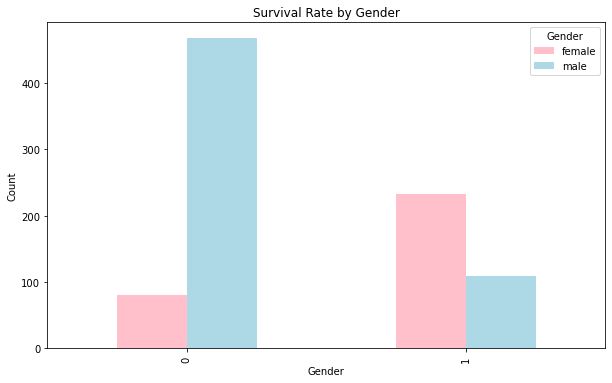

In [12]:
# Plot the side-by-side bar graph
contingency_table2.plot(kind='bar', stacked=False, figsize=(10, 6), color=['pink', 'lightblue'])

# Customize the plot
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Gender", loc="upper right")

# Show the plot
plt.show()


---

## Interpretation of the graph:

_When we examine the side-by-side graph, it becomes evident that there is no apparent independence between Survival Rate and Gender. This suggests a likely association between the two variables. To confirm and formally test our hypothesis, let's proceed with a Chi-Square analysis._

---

---
## Hypotheses

### *H0: Survival Rate and Gender are independent among all subjects in the population*

### *Ha: Survival Rate and Gender are not independent among all subjects in the population*
---

### c) Perform the Chi-Square Test

In [16]:
chi2, p, dof, expected = chi2_contingency(contingency_table2)

# Output the chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 260.71702016732104
P-value: 1.1973570627755645e-58
Degrees of freedom: 1
Expected frequencies table:
[[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


### Conclusion:

_Since the Chi-square value of 260.717 is greater than the critical value Decision Point of 3.84 for 1 Degree of Freedom (as per the Chi-Square Decision Point Table), we have sufficient evidence to reject the null hypothesis. Therefore, we can conclude that the Survival Rate and Gender are not significantly independent of each other among all subjects in the population._

### In conclusion, there are association between Survival Rate and Gender

---
## 3) Determine if the Survival Rate is associated to the Age
---

### a) Categorize in groups "Age" variable and contingency table:

In [14]:
# We create age groups first 'Young', 'Middle-aged', 'Elderly'
age_bins = [0, 18, 45, 100]  
age_labels = ['Young', 'Middle-aged', 'Elderly']

# Create a new column with age groups
titanic['Age Group'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels)

# Create a contingency table
contingency_table3 = pd.crosstab(titanic['Survived'], titanic['Age Group'])

# Display the contingency table
contingency_table3


Age Group,Young,Middle-aged,Elderly
Survived,,,
0,69,290,65
1,70,182,38


### b) Side-by-side Plot

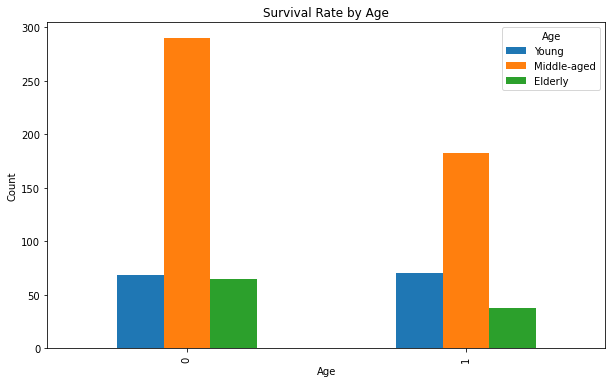

In [15]:
# Plot the side-by-side bar graph with custom colors
contingency_table3.plot(kind='bar', stacked=False, figsize=(10, 6))

# Customize the plot
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Age", loc="upper right")

# Show the plot
plt.show()


### Interpretation of the graph:

_When we examine the side-by-side graph, it becomes evident that there is no apparent independence between Survival Rate and Age. This suggests a likely association between the two variables. To confirm and formally test our hypothesis, let's proceed with a Chi-Square analysis._

---
## Hypotheses

### *H0: Survival Rate and Age are independent among all subjects in the population*

### *Ha: Survival Rate and Age are not independent among all subjects in the population*
---

### c) Perform the Chi-Square Test

In [19]:
chi2, p, dof, expected = chi2_contingency(contingency_table3)

# Output the chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 6.890982901077968
P-value: 0.03188908628235189
Degrees of freedom: 2
Expected frequencies table:
[[ 82.54341737 280.29131653  61.16526611]
 [ 56.45658263 191.70868347  41.83473389]]


### Conclusion:

_Since the Chi-square value of 6.891 is greater than the critical value Decision Point of 5.99 for 2 Degrees of Freedom (as per the Chi-Square Decision Point Table), we have sufficient evidence to reject the null hypothesis. Therefore, we can conclude that the Survival Rate and Gender are not significantly independent of each other among all subjects in the population._

### In conclusion, there are association between Survival Rate and Age